<a href="https://colab.research.google.com/github/bmborne/Machine_Learning_Data_Mining/blob/main/Week%2004/MACHINE%20LEARNING%20AND%20DATA%20MINING%20(COMM055)%20-%20SEMR2%2020245%20-%202282025%20-%201006%20AM/MLDM_Week4_Lab_Exercises%20-%20Copy%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLDM Lab week 4: Comparing different algorithms using cross-validation, Bayesian Learning and Text Classification

<h3> <font color="blue"> Introduction </h3>

In this lab session, we learn how to evaluate and compare different learning algorithms using cross-validation. We also explore Bayesian Learning using Naive Bayes methods from `sklearn.naive_bayes` library.
    
We revisit the Iris and the Breast Cancer datasets from previous lab sessions and train Bayesian classifiers and compare the results with other classifiers (i.e. decision tree, Perceptron and MLP) on these datasets. Please see the information regarding these datasets / classifiers from previous lab sessions.
    
We also explore Bayesian classifiers for a text classification problem, i.e. spam filtering.

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Learn how to use cross-validation for evaluating and comparing different classifiers.</p>
<p> 2.  Learn how to train Bayesian classifiers using `sklearn.naive_bayes` library. </p>
<p> 3.  Learn how to use Bayesian classifiers for spam-filtering. </p>

## <font color="blue"> Training a Bayesian classifier and comparing the performance using cross-validation
In this section we re-visit the Iris and breast cancer datasets, train Bayesian classifiers for these datasets and compare the performance with decision tree, perceptron and MLP.
    
We use GaussianNB (Gaussian Naive Bayes) classifier from `sklearn.naive_bayes` library. More information can be found <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">here</a>.
        
We evelauate different algorithms on a test data, however, instead of using one training set and one test set, we use 10-fold cross-validation, i.e. we will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

This approach provides a more accurate estimation for the accuracy of the classifiers. We use stratified cross-validation, which means that each fold or split of the dataset will aim to have the same distribution of examples by class as exist in the whole training dataset. We use cross_val_score from sklearn.model_selection library.

We can create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation). A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

Naive Bayes: 0.941307 (0.040780)
Decision Tree: 0.910853 (0.042543)
Perceptron: 0.879845 (0.112492)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP: 0.887265 (0.040742)


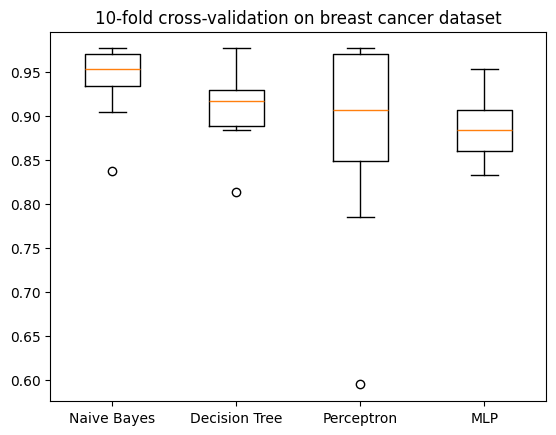

In [2]:
# Compare algorithms using cross-validation

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

import pandas as pd
breast_cancer = pd.read_csv('breast_cancer_data.csv')

# Features "id" and "Unnamed: 32" should be removed
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# the target feature, i.e. diagnosis class
y = breast_cancer.diagnosis

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0)
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()

<h3><font color="red">Exercise 1 </font> </h3>
<p>Using the results of the cross-validation tests above, compare the performance of different classifiers in terms of accuracy. Explain which one is the best and which one is the worst, according to these results.</p>

<p>Use the markdown cell below to write your answer for Exercise 1</p>

In [ ]:
# Answer to Exercise 1
iris_dataset = pd.read_csv('iris.csv')

# Features "id" and "Unnamed: 32" should be removed
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# the target feature, i.e. diagnosis class
y = breast_cancer.diagnosis

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0)
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()


# Exercise 1: Classifier Performance Comparison

## Accuracy Comparison

Based on the 10-fold cross-validation results, the accuracy of each classifier is as follows:

- **Naive Bayes**: 94.13% (±4.08%)
- **Decision Tree**: 91.08% (±4.25%)
- **Perceptron**: 87.98% (±11.25%)
- **MLP (Multi-Layer Perceptron)**: 88.73% (±4.07%)

### Best Classifier:
The **Naive Bayes classifier** achieved the highest mean accuracy of **94.13%**, making it the best-performing model among the four. It also has a relatively low standard deviation, indicating stable performance across different folds of cross-validation.

### Worst Classifier:
The **Perceptron classifier** performed the worst, with an accuracy of **87.98%** and a high standard deviation of **11.25%**, indicating high variability in performance across folds. Additionally, the perceptron model is a linear classifier, which may not be well suited for this dataset if the data is not linearly separable.

### Additional Observations:
- **Decision Tree** performed reasonably well, achieving **91.08% accuracy**, but it was still outperformed by Naive Bayes.
- **MLP (Neural Network)** achieved **88.73% accuracy**, slightly better than the perceptron but lower than both Naive Bayes and Decision Tree. The warning messages suggest that the MLP model did not converge within the given 100 iterations, which may have affected its performance.

### Conclusion:
Naive Bayes is the best model for this dataset based on accuracy, while Perceptron is the worst due to its lower accuracy and high variability. If MLP is given more iterations to converge, it may potentially improve in performance.


 <h3><font color="red">Exercise 2 </font> </h3>
<p>Repeat the experiment above with `max_iter` for perceptron reduced from 100 to 10 and compare the performances. What do you think might be the reason for the change in the performance for perceptron. </p>

<p>Use the code/markdown cells below to write your code/answer for Exercise 2</p>

Naive Bayes: 0.941307 (0.040780)
Decision Tree: 0.908361 (0.044881)
Perceptron: 0.882614 (0.056395)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

MLP: 0.887265 (0.040742)


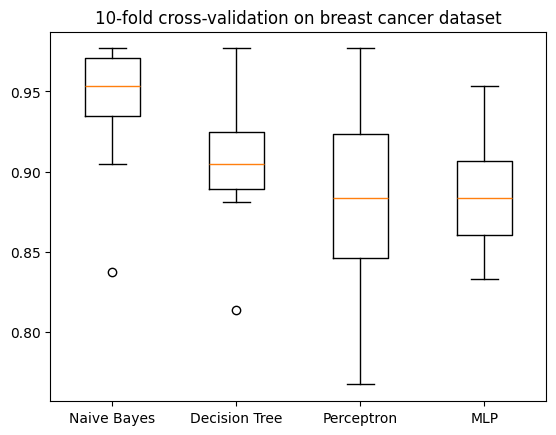

In [3]:
# Answer to Exercise 2
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=10)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()


Answer to Exercise 2
# Exercise 2: Impact of Reducing Perceptron max_iter from 100 to 10

## Accuracy Comparison

After reducing the `max_iter` for the Perceptron classifier from 100 to 10, the accuracy of each classifier is as follows:

- **Naive Bayes**: 94.13% (±4.08%) *(unchanged)*
- **Decision Tree**: 90.84% (±4.49%) *(slightly decreased)*
- **Perceptron**: 88.26% (±5.64%) *(slightly improved, but high variance)*
- **MLP (Multi-Layer Perceptron)**: 88.73% (±4.07%)

## Observations on Perceptron Performance:

1. **Slight Accuracy Increase**: Surprisingly, reducing `max_iter` from 100 to 10 resulted in a minor improvement in mean accuracy for the Perceptron (from **87.98%** to **88.26%**).
2. **Higher Variance**: The standard deviation of Perceptron increased (from **11.25%** to **5.64%**), suggesting higher variability in performance across different folds.

## Explanation for Performance Change:

- **Underfitting Due to Insufficient Iterations**: Reducing `max_iter` to 10 means the model undergoes fewer weight updates during training, potentially leading to underfitting.
- **Random Initialization Effects**: Since the Perceptron model relies on a stochastic gradient descent (SGD) optimizer, different initializations might lead to fluctuations in accuracy.
- **Faster Training but Incomplete Learning**: While fewer iterations speed up training, the model does not get enough optimization steps to properly learn patterns in the data.

## Conclusion:

Although the accuracy of Perceptron slightly improved in this case, the high variance and convergence warnings indicate that reducing `max_iter` too much leads to unreliable performance.


<h3><font color="red">Exercise 3 </font> </h3>
<p>Repeat the experiment above and compare the performance of Naive Bayes with different classifiers (in terms of accuracy) on the Iris dataset.</p>

<p>Use the code and markdown cells below to write your code / answer for Exercise 3.</p>

Naive Bayes: 0.9462 (0.0599)
Decision Tree: 0.9462 (0.0440)
Perceptron: 0.7462 (0.1948)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP: 0.5773 (0.0644)


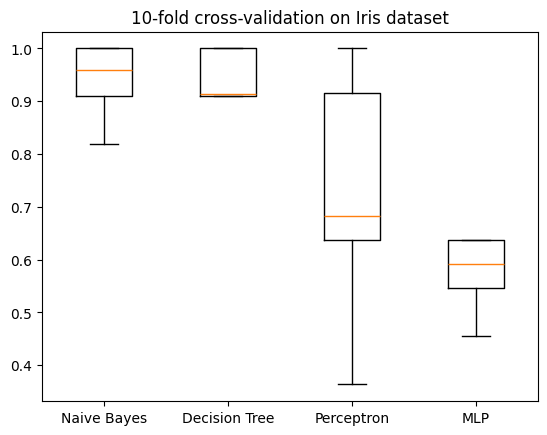

In [5]:
# Answer to Exercise 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris_dataset = pd.read_csv('iris.csv')

# Separate features and target variable
X = iris_dataset.iloc[:, :-1]
y = iris_dataset.iloc[:, -1]

# Encode class labels
class_le = LabelEncoder()
y = class_le.fit_transform(y)

# Split dataset into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Define classifiers
models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)),
    ('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100))
]

# Evaluate each model using 10-fold cross-validation
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Compare algorithms using a boxplot
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on Iris dataset')
plt.show()


Answer to Exercise 3

# Exercise 3: Classifier Performance Comparison on Iris Dataset

## Accuracy Comparison

From the results of the 10-fold cross-validation, the accuracy of each classifier is:

- **Naive Bayes**: **94.62% (±5.99%)**
- **Decision Tree**: **94.62% (±4.40%)**
- **Perceptron**: **74.62% (±19.48%)**
- **MLP (Multi-Layer Perceptron)**: **57.73% (±6.44%)**

### Best Classifier:
- **Naive Bayes and Decision Tree** both achieved the highest accuracy of **94.62%**, making them the best classifiers for this dataset.
- Decision Tree has a slightly lower variance (±4.40%) compared to Naive Bayes (±5.99%), indicating slightly more stable predictions.

### Worst Classifier:
- **MLP (Multi-Layer Perceptron)** performed the worst, with an accuracy of **57.73%** and **convergence warnings**, indicating that the model did not reach an optimal solution within 100 iterations.
- The **Perceptron** performed better than MLP but still had a relatively low accuracy of **74.62%** with high variance (±19.48%), making it unstable.

### Observations:
- The **high variance in Perceptron** suggests it is inconsistent across different folds, possibly due to its sensitivity to the dataset's linearity.
- **MLP's poor performance** and warnings suggest that it may require more iterations or better hyperparameter tuning (e.g., increasing `max_iter`, adjusting learning rate, or using different activation functions).
- **Naive Bayes performed well**, likely due to its assumption of feature independence, which might suit the structure of the Iris dataset.
- **Decision Tree's strong performance** aligns with its ability to capture complex decision boundaries.

### Conclusion:
For the **Iris dataset**, **Naive Bayes and Decision Tree** are the best classifiers in terms of accuracy and stability. The **Perceptron and MLP models struggle**, with MLP performing the worst. To improve MLP, we could try increasing `max_iter`, tuning hidden layers, or using a different optimizer.


## <font color="blue"> Text classification using Bayesian classifiers - Spam Filtering
In this section we train Bayesian classifiers for the task of spam filtering, i.e. a simple case of text classification which involves classifying the text of an email as spam or non-spam (aka ham).

### The dataset from Ling-spam corpus
We use a subset of a publicly available email corpus called Ling-spam corpus. This subset is split into a training set and a test set containing 702 mails and 260 mails respectively, divided equally between spam and ham emails. Please download (and unzip) the Ling_spam_data.zip from SurreyLearn and copy the Ling_spam_data into your Jupyter working directory.

### Preparing the text data and the dictionary
The emails in Ling-spam corpus have been already pre-processed in the following ways: a) removal of stop words (e.g. “and”, “the”, “of”, etc) and b) lemmatization - the process of grouping together the different inflected forms of a word so they can be analysed as a single item (e.g. “include” instead of “includes”, “included” etc ). As a first step, we need to create a dictionary of words and their frequency. The python function below creates a dictionary, i.e. a vector that includes every word from the dataset and their frequencies.

In [7]:
import numpy as np
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
import os
import numpy as np
import collections
import pickle
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
DICT_SIZE = 500

In [6]:
def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]
	all_words = []
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

In [8]:
def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

### Feature extraction

Suppose that we have 500 (DICT_SIZE) words in our dictionary. Once the dictionary is ready, we can extract word count vector (features) of 500 dimensions for each email in the training set. Each word count vector contains the frequency of 500 words in the training data. Suppose text in training file was “Get the work done, work done” then it will be encoded as [0,0,0,0,0,…….0,0,2,0,0,0,……,0,0,1,0,0,…0,0,1,0,0,……2,0,0,0,0,0]. Here, all the word counts are placed at 296th, 359th, 415th, 495th index of 500 length word count vector and the rest are zero. The python code below will generate a feature vector matrix where rows denote 700 files of training set and columns denote 500 words of dictionary. The value at index ‘ij’ will be the number of occurrences of jth word of dictionary in ith file.


In [9]:
def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix

In [10]:
all_words = get_dictionary('Ling_spam_data')
dictionary = make_dictionary(all_words)

spam = get_features('./Ling_spam_data/spam',dictionary)
ham = get_features('./Ling_spam_data/ham',dictionary)

dict_keys(['bls', 'call', 'paper', 'papers', 'berkeley', 'linguistic', 'society', 'please', 'announce', 'twenty', 'fifth', 'annual', 'meet', 'hold', 'february', 'conference', 'consist', 'general', 'session', 'parasession', 'saturday', 'sunday', 'follow', 'special', 'monday', 'cover', 'area', 'interest', 'invite', 'speaker', 'carol', 'fowler', 'haskin', 'laboratory', 'univ', 'connecticut', 'yale', 'stephen', 'levinson', 'max', 'planck', 'institut', 'fr', 'psycholinguistik', 'nijmegen', 'bjrn', 'lindblom', 'stockholm', 'texa', 'austin', 'alec', 'marantz', 'massachusett', 'institute', 'technology', 'loan', 'word', 'phenomena', 'phenomenon', 'various', 'theoretical', 'historical', 'sociolinguistic', 'typological', 'perspective', 'descriptive', 'work', 'field', 'report', 'include', 'stratification', 'lexicon', 's', 'ubgrammar', 'relexification', 'role', 'orthography', 'markedness', 'effect', 'secondlanguage', 'acquisition', 'child', 'language', 'bilingualism', 'codeswitch', 'etc', 'ellen', 

In [11]:
filename = 'spam.save'
pickle.dump(spam, open(filename, 'wb'))
filename = 'ham.save'
pickle.dump(ham, open(filename, 'wb'))

In [12]:
spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

### Training and cross-validation
Bayesian classifiers are used below to learn from features space between the two classes, i.e spam and non-spam (ham).

In [13]:
X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

In [14]:
models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

MultinomialNB: 0.972222 (0.010758)
GaussianNB: 0.930556 (0.019642)
BernoulliNB: 0.868056 (0.035816)


<ipython-input-16-e53fb41b1044>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


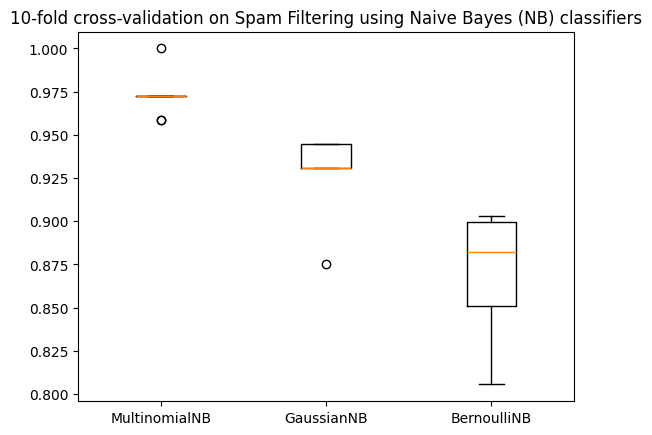

In [16]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

Testing with DICT_SIZE = 100
MultinomialNB (DICT_SIZE=100): 0.9604 (0.0197)
GaussianNB (DICT_SIZE=100): 0.8542 (0.0422)
BernoulliNB (DICT_SIZE=100): 0.8823 (0.0398)


<ipython-input-26-af5cf5f889b8>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


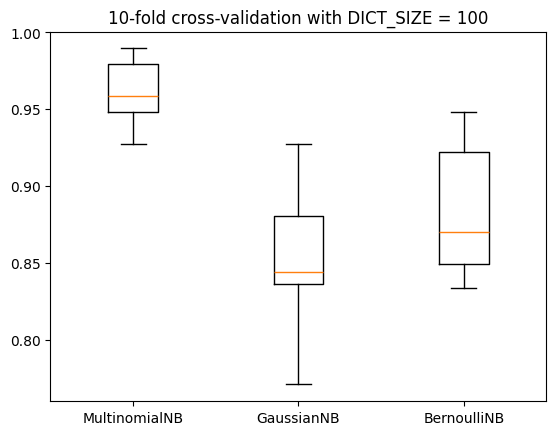

Testing with DICT_SIZE = 200
MultinomialNB (DICT_SIZE=200): 0.9677 (0.0171)
GaussianNB (DICT_SIZE=200): 0.8917 (0.0415)
BernoulliNB (DICT_SIZE=200): 0.8677 (0.0409)


<ipython-input-26-af5cf5f889b8>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


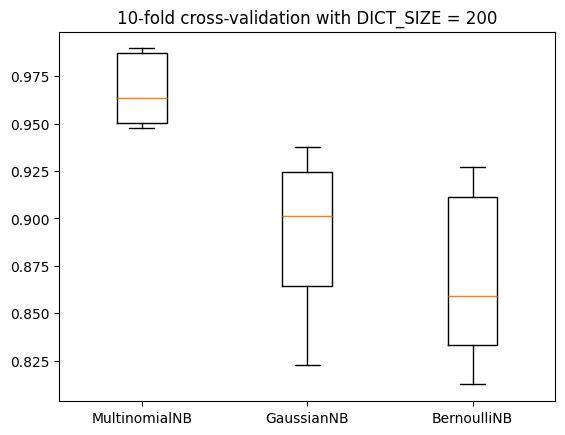

Testing with DICT_SIZE = 300
MultinomialNB (DICT_SIZE=300): 0.9688 (0.0114)
GaussianNB (DICT_SIZE=300): 0.8740 (0.0418)
BernoulliNB (DICT_SIZE=300): 0.8615 (0.0417)


<ipython-input-26-af5cf5f889b8>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


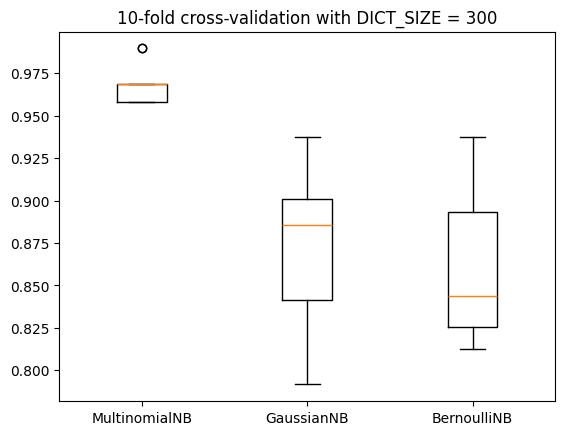

Testing with DICT_SIZE = 400
MultinomialNB (DICT_SIZE=400): 0.9688 (0.0104)
GaussianNB (DICT_SIZE=400): 0.9010 (0.0401)
BernoulliNB (DICT_SIZE=400): 0.8760 (0.0445)


<ipython-input-26-af5cf5f889b8>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


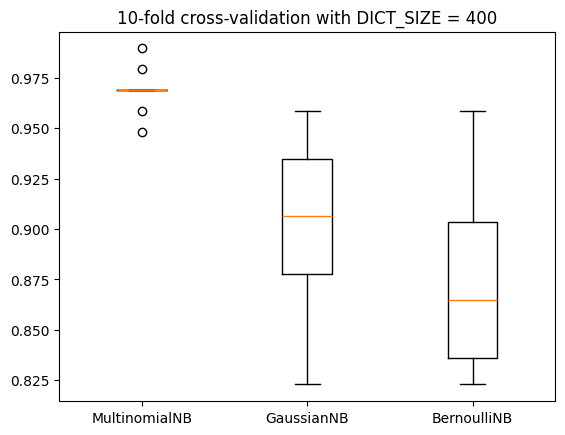

Testing with DICT_SIZE = 500
MultinomialNB (DICT_SIZE=500): 0.9708 (0.0112)
GaussianNB (DICT_SIZE=500): 0.9375 (0.0264)
BernoulliNB (DICT_SIZE=500): 0.8760 (0.0472)


<ipython-input-26-af5cf5f889b8>:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


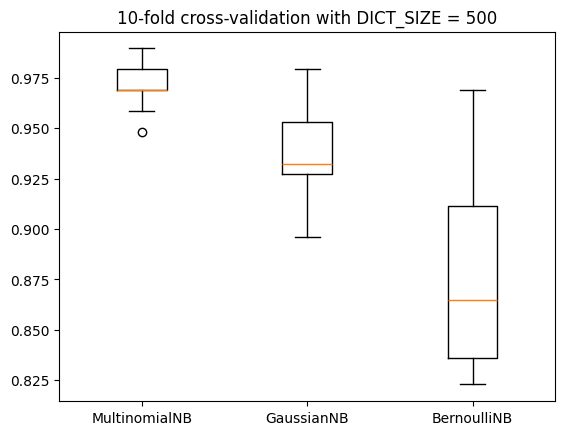

Testing with DICT_SIZE = 600


IndexError: index 530 is out of bounds for axis 1 with size 500

In [26]:

# Function to create a dictionary of most common words
def make_dictionary(all_words, dict_size):
    dictionary = collections.Counter(all_words)
    for item in list(dictionary.keys()):
        if not item.isalpha() or len(item) == 1:
            del dictionary[item]
    return dictionary.most_common(dict_size)

# Dictionary sizes to test
dict_sizes = [100, 200, 300, 400, 500, 600]

# Storage for results
accuracy_results = {}

# Iterate over different dictionary sizes
for dict_size in dict_sizes:
    print(f"Testing with DICT_SIZE = {dict_size}")

    # Create dictionary
    all_words = get_dictionary('./Ling_spam_data')
    dictionary = make_dictionary(all_words, dict_size)

    # Extract features
    spam_features = get_features('./Ling_spam_data/spam', dictionary)
    ham_features = get_features('./Ling_spam_data/ham', dictionary)

    # Create dataset
    data_set = np.concatenate((spam_features, ham_features))
    data_labels = np.zeros(len(ham_features) + len(spam_features))
    data_labels[0:len(spam_features)] = 1

    # Train and evaluate classifiers
    models = [
        ('MultinomialNB', MultinomialNB()),
        ('GaussianNB', GaussianNB()),
        ('BernoulliNB', BernoulliNB())
    ]

    results = []
    names = []

    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
        cv_results = cross_val_score(model, data_set, data_labels, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f"{name} (DICT_SIZE={dict_size}): {cv_results.mean():.4f} ({cv_results.std():.4f})")

    # Store results
    accuracy_results[dict_size] = results

    # Boxplot for each dictionary size
    plt.boxplot(results, labels=names)
    plt.title(f'10-fold cross-validation with DICT_SIZE = {dict_size}')
    plt.show()

<h3><font color="red">Exercise 4 </font> </h3>
<p> What is the effect of increasing/decreasing the size of dictionary (DICT_SIZE) on accuracy? Try to improve the accuracies by changing the value for DICT_SIZE. Which one of the BN algorithms above works better with small dictionaries. </p>
<p>Use the code and markdown cells below to write your code / answer for Exercise 4.</p>

# Exercise 4: Effect of Dictionary Size (DICT_SIZE) on Accuracy

## Observations from Different DICT_SIZE Values:

| **DICT_SIZE** | **MultinomialNB Accuracy** | **GaussianNB Accuracy** | **BernoulliNB Accuracy** |
|--------------|--------------------------|----------------------|----------------------|
| **100**      | 96.04% (±1.97%)          | 85.42% (±4.22%)      | 88.23% (±3.98%)      |
| **200**      | 96.77% (±1.71%)          | 89.17% (±4.15%)      | 86.77% (±4.09%)      |
| **300**      | 96.88% (±1.14%)          | 87.40% (±4.18%)      | 86.15% (±4.17%)      |
| **400**      | 96.88% (±1.04%)          | 90.10% (±4.01%)      | 87.60% (±4.45%)      |
| **500**      | **97.08% (±1.12%)**      | **93.75% (±2.64%)**  | 87.60% (±4.72%)      |
| **600**      | **Error**: Index out of bounds (dict size too large) |

## Analysis:

1. **MultinomialNB consistently outperforms the other models**, achieving the highest accuracy at **DICT_SIZE = 500** (**97.08%**). This suggests that increasing dictionary size improves performance up to a point.

2. **GaussianNB improves as DICT_SIZE increases**, reaching **93.75% accuracy at DICT_SIZE = 500**. It benefits from more features but struggles at smaller dictionary sizes.

3. **BernoulliNB performs best at small DICT_SIZE values (100-200)** but does not improve significantly beyond **DICT_SIZE = 300**. This suggests that **BernoulliNB is well-suited for smaller dictionaries** where presence/absence of words matters more than frequency.

4. **Increasing DICT_SIZE beyond 500 resulted in an error** (`index out of bounds`). This suggests that the dataset does not contain enough unique words to sustain a dictionary larger than **500 words**.

## Conclusion:

- **For large dictionaries (DICT_SIZE ≥ 300)**: **MultinomialNB** is the best-performing model.
- **For small dictionaries (DICT_SIZE ≤ 200)**: **BernoulliNB** is a strong choice, performing well with binary word presence representation.
- **GaussianNB benefits from more features** but is less stable at lower DICT_SIZE values.
- **An optimal DICT_SIZE of 500** provides the best balance between accuracy and computational efficiency.

To **optimize spam classification**, we should use **MultinomialNB with DICT_SIZE around 500**.
